In [1]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "https://en.wikipedia.org/wiki/Comparison_of_North_American_ski_resorts"
email = "wella2@byu.edu"
ua = f"STAT386-class-scraper/1.0 (+{email})"

r = requests.get(url, headers={"User-Agent": ua}, timeout=15)
r.raise_for_status()

tables = pd.read_html(r.text)

for i, t in enumerate(tables):
    print(i, t.shape)


/var/folders/2n/z5c1xg815rnc8_7vb9lnwrj40000gn/T/ipykernel_91338/2635439023.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)


0 (4, 2)
1 (1, 2)
2 (1, 2)
3 (1, 2)
4 (509, 11)


In [3]:
url = "https://en.wikipedia.org/wiki/Comparison_of_North_American_ski_resorts"

email = "wella2@byu.edu"
ua = f"STAT386-class-scraper/1.0 (+{email})"

# Fetch page
r = requests.get(
    url,
    headers={"User-Agent": ua, "From": email},
    timeout=15
)
r.raise_for_status()

# Extract all tables
tables = pd.read_html(r.text)

# Take the first table
df = tables[4]

df.head()


/var/folders/2n/z5c1xg815rnc8_7vb9lnwrj40000gn/T/ipykernel_91338/630745750.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)


,Resort name and website,Nearest city,State/province,Peak elevation (ft),Base elevation (ft),Vertical drop (ft),Skiable acreage,Total trails,Total lifts,Average annual snowfall (in),Date statistics updated
0,Ski Bromont,Bromont,Quebec,1854,590,1264,450,141.0,9.0,190,"January 29, 2025"
1,Apex Mountain Resort,Penticton,British Columbia,7197,5197,2000,1112,79.0,4.0,236,"January 29, 2025[1]"
2,Canyon Ski Area,Red Deer,Alberta,2950,2412,538,80,23.0,6.0,45,"January 29, 2025"
3,Fernie Alpine Resort,Fernie,British Columbia,7000,3450,3550,2500,142.0,10.0,360,"January 29, 2025[2]"
4,Marble Mountain Ski Resort,Steady Brook,Newfoundland and Labrador,1791,33,1759,285,40.0,5.0,192,"January 29, 2025"


In [4]:
# Making a CSV file
df.to_csv("ski_resorts.csv", index=False)

In [5]:
#### Cleaning up the data ####

# Remove last column
df = df.iloc[:, :-1]

# Rename columns
df.columns = ["Resort Name", "Nearest City", "State/Province", "Peak Elevation (ft)", "Base Elevation (ft)", 
              "Vertical Drop (ft)", "Skiable Area (acres)", "Total Trails", 
              "Total Lifts", "Average Annual Snowfall (inches)"]

# Remove rows with missing Annual Snowfall
df = df[df["Average Annual Snowfall (inches)"].notna()]

# Removing brackets and their contents from string columns
def remove_brackets(text):
    if pd.isna(text):
        return text
    return re.sub(r'\[.*?\]', '', str(text)).strip()

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].apply(remove_brackets)


# Cleaning numeric columns
def clean_numeric(val):
    if pd.isna(val):
        return np.nan
    val = str(val)
    val = re.sub(r'[^\d.]', '', val)  # remove everything except digits and dot
    if val == '':
        return np.nan
    return float(val)

numeric_cols = ['Top Elevation', 'Base Elevation', 'Vertical', 'Skiable Area', 
                'Number of Trails', 'Number of Lifts', 'Longest Run']

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].apply(clean_numeric)

# Clean categorial columns
df['Resort Name'] = df['Resort Name'].str.strip()
df['Nearest City'] = df['Nearest City'].str.strip()
df['State/Province'] = df['State/Province'].str.strip()

df.head()

,Resort Name,Nearest City,State/Province,Peak Elevation (ft),Base Elevation (ft),Vertical Drop (ft),Skiable Area (acres),Total Trails,Total Lifts,Average Annual Snowfall (inches)
0,Ski Bromont,Bromont,Quebec,1854,590,1264,450,141.0,9.0,190
1,Apex Mountain Resort,Penticton,British Columbia,7197,5197,2000,1112,79.0,4.0,236
2,Canyon Ski Area,Red Deer,Alberta,2950,2412,538,80,23.0,6.0,45
3,Fernie Alpine Resort,Fernie,British Columbia,7000,3450,3550,2500,142.0,10.0,360
4,Marble Mountain Ski Resort,Steady Brook,Newfoundland and Labrador,1791,33,1759,285,40.0,5.0,192


<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 464
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Resort Name                       398 non-null    object 
 1   Nearest City                      398 non-null    object 
 2   State/Province                    398 non-null    object 
 3   Peak Elevation (ft)               393 non-null    object 
 4   Base Elevation (ft)               393 non-null    object 
 5   Vertical Drop (ft)                398 non-null    object 
 6   Skiable Area (acres)              393 non-null    object 
 7   Total Trails                      393 non-null    float64
 8   Total Lifts                       393 non-null    float64
 9   Average Annual Snowfall (inches)  398 non-null    object 
dtypes: float64(2), object(8)
memory usage: 34.2+ KB


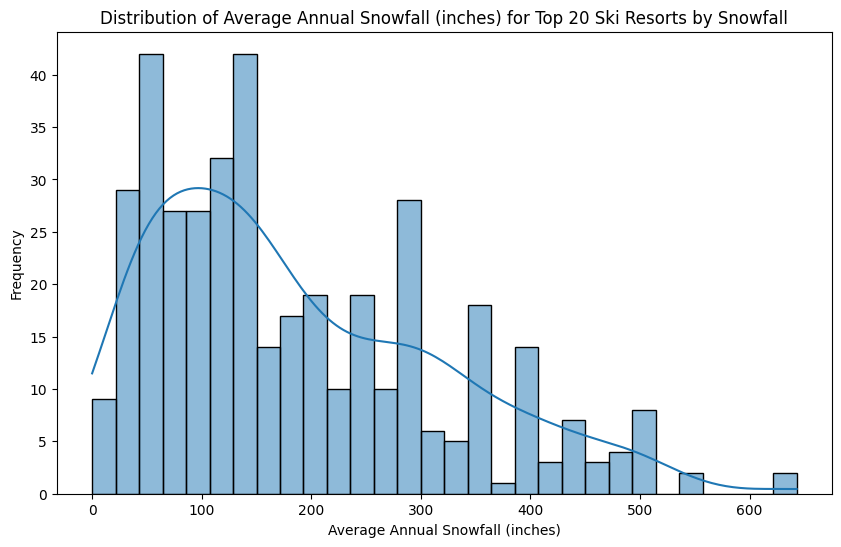

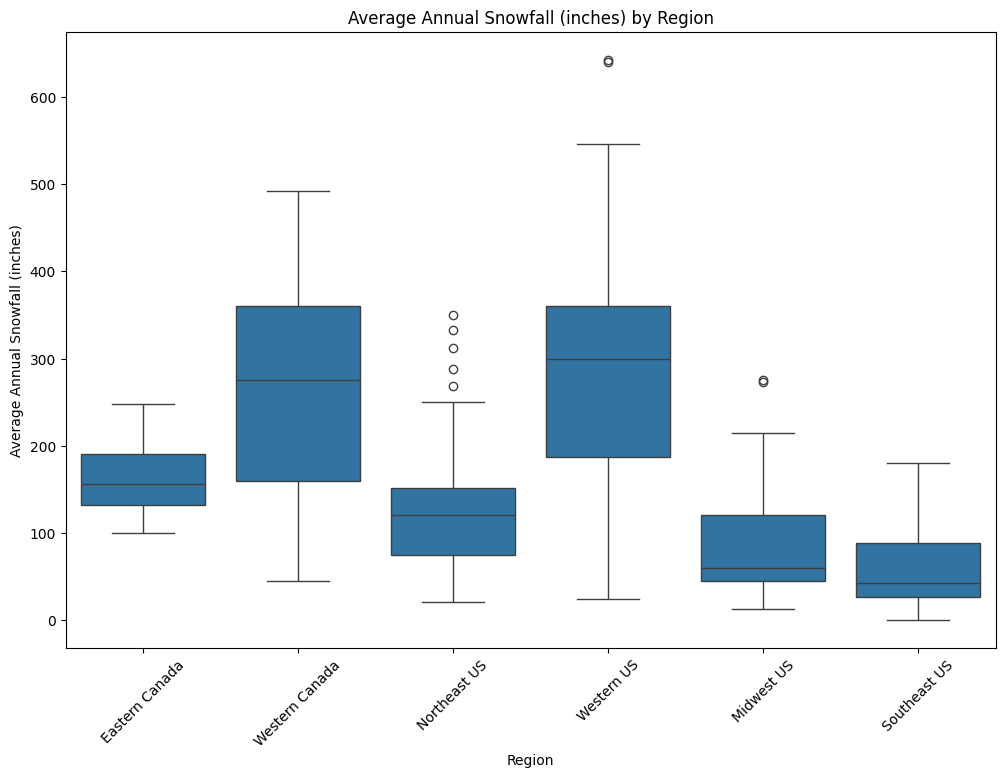

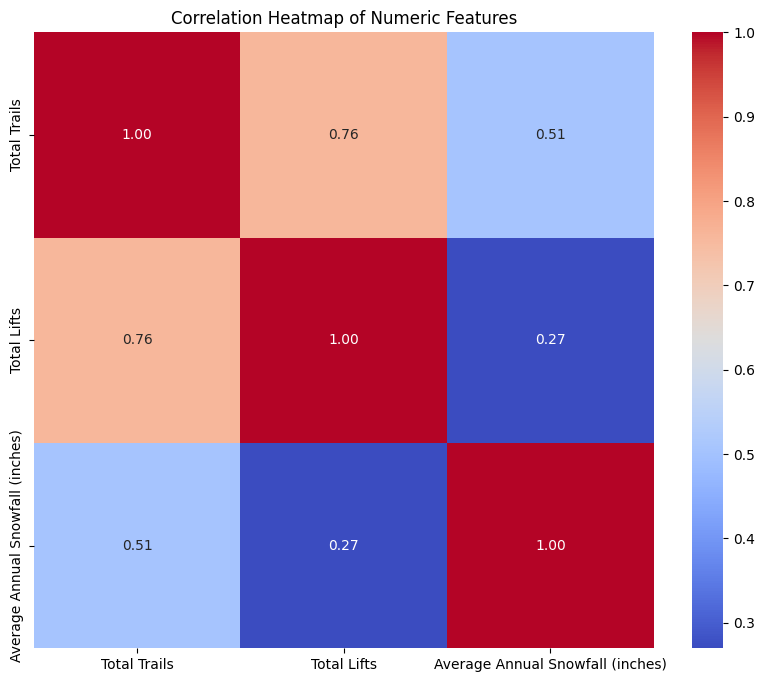

TypeError: Column 'Skiable Area (acres)' has dtype object, cannot use method 'nlargest' with this dtype

In [6]:
#### EDA ####

df.describe()
df.info()

# Plot distribution of Average Annual Snowfall with filter for top 20

# Converting 'Average Annual Snowfall (inches)' to numeric
df["Average Annual Snowfall (inches)"] = pd.to_numeric(df["Average Annual Snowfall (inches)"], errors="coerce")

top_20_snowfall = df.nlargest(20, 'Average Annual Snowfall (inches)')
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Annual Snowfall (inches)'].dropna(), bins=30, kde=True)
plt.title('Distribution of Average Annual Snowfall (inches) for Top 20 Ski Resorts by Snowfall')
plt.xlabel('Average Annual Snowfall (inches)')
plt.ylabel('Frequency')
plt.show()

# Annual Snowfall by State/Province
# Grouping State/Province by geographic regions
state_region_map = {
    'Quebec': 'Eastern Canada',
    'British Columbia': 'Western Canada', 
    'Alberta': 'Western Canada',
    'Newfoundland and Labrador': 'Eastern Canada',
    'Nova Scotia': 'Eastern Canada',
    'Vermont': 'Northeast US',
    'Colorado': 'Western US',
    'Wyoming': 'Western US', 
    'Nevada': 'Western US', 
    'Idaho': 'Western US', 
    'Montana': 'Western US', 
    'Arizona': 'Western US', 
    'New Mexico': 'Western US',
    'Oregon': 'Western US', 
    'California': 'Western US', 
    'Alaska': 'Western US', 
    'Maine': 'Northeast US', 
    'Michigan': 'Midwest US',
    'New Jersey': 'Northeast US', 
    'Ontario': 'Eastern Canada', 
    'Utah': 'Western US', 
    'New York': 'Northeast US', 
    'West Virginia': 'Southeast US',
    'Washington': 'Western US', 
    'North Carolina': 'Southeast US', 
    'South Dakota': 'Midwest US', 
    'Virginia': 'Southeast US',
    'North Dakota': 'Midwest US', 
    'Connecticut': 'Northeast US', 
    'Rhode Island': 'Northeast US', 
    'Missouri': 'Midwest US',
    'Tennessee': 'Southeast US', 
    'Indiana': 'Midwest US', 
    'Ohio': 'Midwest US', 
    'Maryland': 'Southeast US', 
    'Massachusetts': 'Northeast US',
    'Illinois': 'Midwest US', 
    'Iowa': 'Midwest US', 
    'Alabama': 'Southeast US', 
    'Minnesota': 'Midwest US', 
    'New Hampshire': 'Northeast US',
    'Pennsylvania': 'Northeast US', 
    'Wisconsin': 'Midwest US'
}
df["Region"] = df["State/Province"].map(state_region_map)

plt.figure(figsize=(12, 8))
sns.boxplot(
    x='Region', 
    y='Average Annual Snowfall (inches)', 
    data=df
)
plt.title('Average Annual Snowfall (inches) by Region')
plt.xlabel('Region')
plt.ylabel('Average Annual Snowfall (inches)')
plt.xticks(rotation=45)
plt.show()

# Correlation Heat Map using seaborn
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Plot of skiable area vs total lifts for top 100 resorts by skiable area
top_100_skiable_area = df.nlargest(100, 'Skiable Area (acres)')
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Skiable Area (acres)', 
    y='Total Lifts', 
    data=top_100_skiable_area,
    s=100
)
plt.title('Skiable Area vs Total Lifts for Top 100 Resorts by Skiable Area')
plt.xlabel('Skiable Area (acres)')
plt.ylabel('Total Lifts')
plt.show()  


In [7]:
df['State/Province'].unique()

array(['Quebec', 'British Columbia', 'Alberta',
       'Newfoundland and Labrador', 'Nova Scotia', 'Vermont', 'Colorado',
       'Wyoming', 'Nevada', 'Idaho', 'Montana', 'Arizona', 'New Mexico',
       'Oregon', 'California', 'Alaska', 'Maine', 'Michigan',
       'New Jersey', 'Ontario', 'Utah', 'New York', 'West Virginia',
       'Washington', 'North Carolina', 'South Dakota', 'Virginia',
       'North Dakota', 'Connecticut', 'Rhode Island', 'Missouri',
       'Tennessee', 'Indiana', 'Ohio', 'Maryland', 'Massachusetts',
       'Illinois', 'Iowa', 'Alabama', 'Minnesota', 'New Hampshire',
       'Pennsylvania', 'Wisconsin'], dtype=object)

In [8]:
df['Peak Elevation (ft)'] = pd.to_numeric(df['Peak Elevation (ft)'], errors='coerce')

# Get top 10 resorts by peak elevation
top10_elevation = df.nlargest(10, 'Peak Elevation (ft)')
print(top10_elevation)

                    Resort Name   Nearest City State/Province  \
269          Silverton Mountain      Silverton       Colorado   
24         Telluride Ski Resort      Telluride       Colorado   
25               Arapahoe Basin       Keystone       Colorado   
32            Loveland Ski Area     Georgetown       Colorado   
36      Breckenridge Ski Resort   Breckenridge       Colorado   
122                    Snowmass          Aspen       Colorado   
27              Taos Ski Valley           Taos     New Mexico   
35              Keystone Resort       Keystone       Colorado   
73   Copper Mountain (Colorado)         Frisco       Colorado   
260               Crested Butte  Crested Butte       Colorado   

     Peak Elevation (ft) Base Elevation (ft) Vertical Drop (ft)  \
269              13487.0               10400               3087   
24               13150.0                8725               4425   
25               13050.0               10520               2530   
32              

<Axes: xlabel='Vertical Drop (ft)', ylabel='Count'>

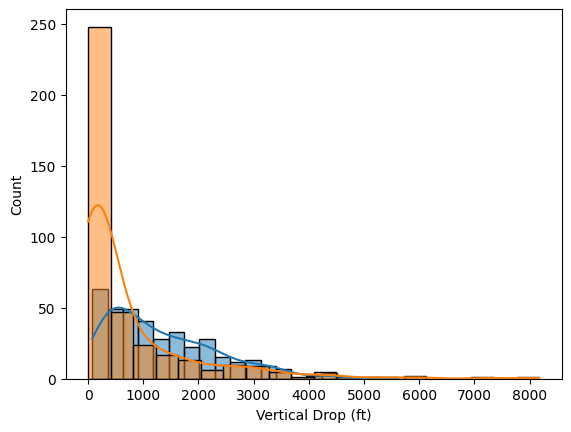

In [18]:
sns.histplot(df['Vertical Drop (ft)'], bins=20, kde=True)
sns.histplot(df['Skiable Area (acres)'], bins=20, kde=True)


/var/folders/2n/z5c1xg815rnc8_7vb9lnwrj40000gn/T/ipykernel_91338/4026700966.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_elevation,
/var/folders/2n/z5c1xg815rnc8_7vb9lnwrj40000gn/T/ipykernel_91338/4026700966.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


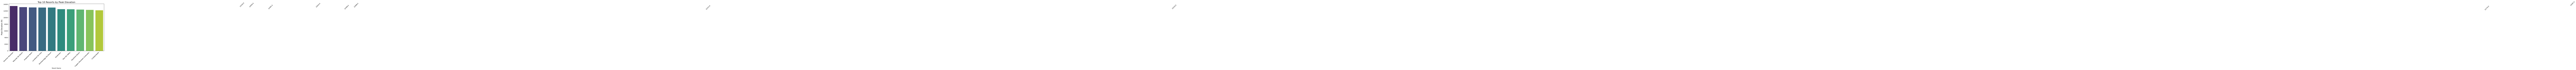

In [10]:
plt.figure(figsize=(12,6))

# Barplot
sns.barplot(data=top10_elevation, 
            x='Resort Name', 
            y='Peak Elevation (ft)', 
            palette='viridis')

# Annotate each bar
for index, row in top10_elevation.iterrows():
    plt.text(index, row['Peak Elevation (ft)'] + 50, 
             str(row['Peak Elevation (ft)']), 
             ha='center', fontsize=10, rotation=45)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Peak Elevation (ft)', fontsize=12)
plt.title('Top 10 Resorts by Peak Elevation', fontsize=16)
plt.tight_layout()
plt.show()

In [11]:
df['Average Annual Snowfall (inches)'] = pd.to_numeric(df['Average Annual Snowfall (inches)'], errors='coerce')

# Get top 10 resorts by Average Annual Snowfall (inches)
top10_snow = df.nlargest(10, 'Average Annual Snowfall (inches)')
print(top10_snow)

                   Resort Name     Nearest City State/Province  \
66              Alyeska Resort         Girdwood         Alaska   
110                   Mt Baker          Glacier     Washington   
90               Alta Ski Area   Salt Lake City           Utah   
257           Timberline Lodge  Government Camp         Oregon   
12        Grand Targhee Resort             Alta        Wyoming   
16   Pomerelle Mountain Resort           Albion          Idaho   
44                    Kirkwood         Kirkwood     California   
47                  Sugar Bowl           Norden     California   
89         Brighton Ski Resort   Salt Lake City           Utah   
91                    Snowbird   Salt Lake City           Utah   

     Peak Elevation (ft) Base Elevation (ft) Vertical Drop (ft)  \
66                3939.0                 250               2500   
110               5089.0                3500               1589   
90               11068.0                8530               2538   
257  

/var/folders/2n/z5c1xg815rnc8_7vb9lnwrj40000gn/T/ipykernel_91338/1797168909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


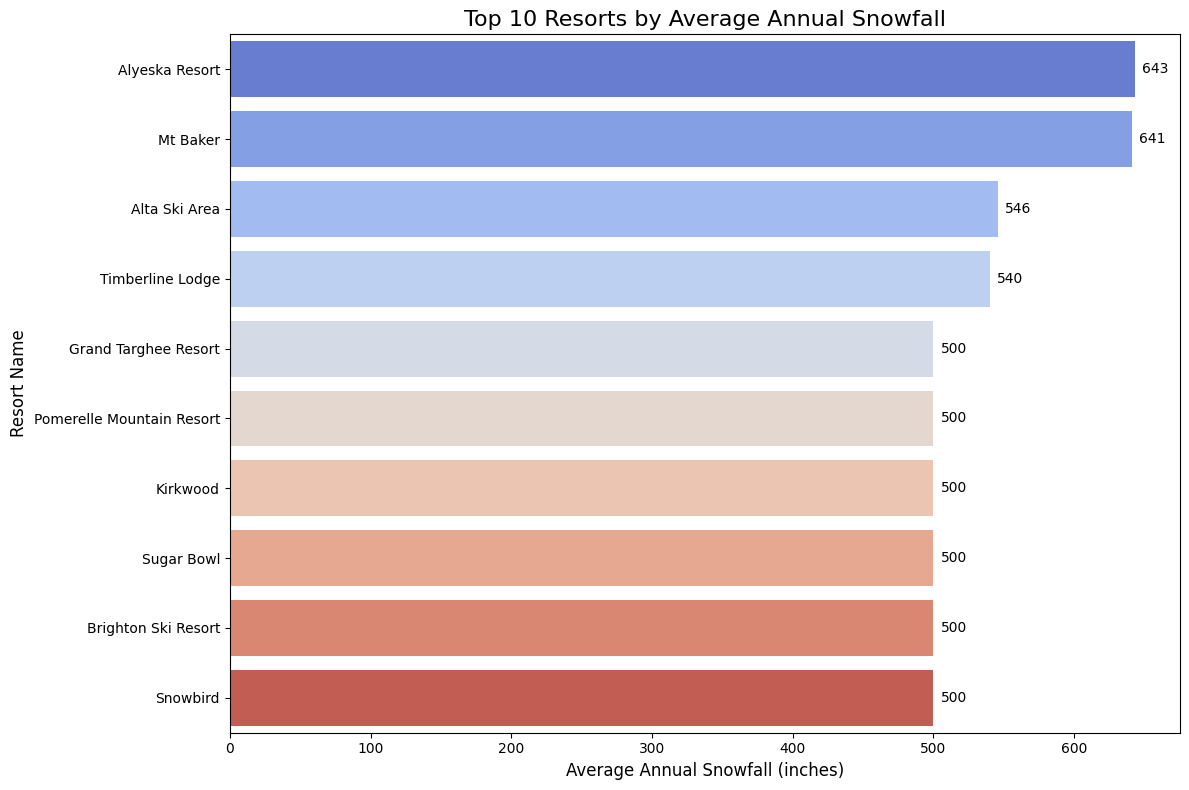

In [12]:
plt.figure(figsize=(12,8))

# Horizontal barplot
sns.barplot(
    data=top10_snow,
    y='Resort Name', 
    x='Average Annual Snowfall (inches)', 
    palette='coolwarm'
)

# Annotate each bar
for i, (resort, snowfall) in enumerate(zip(top10_snow['Resort Name'], top10_snow['Average Annual Snowfall (inches)'])):
    plt.text(snowfall + 5, i, str(snowfall), va='center', fontsize=10)

# Labels and title
plt.xlabel('Average Annual Snowfall (inches)', fontsize=12)
plt.ylabel('Resort Name', fontsize=12)
plt.title('Top 10 Resorts by Average Annual Snowfall', fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/2n/z5c1xg815rnc8_7vb9lnwrj40000gn/T/ipykernel_91338/1968663872.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


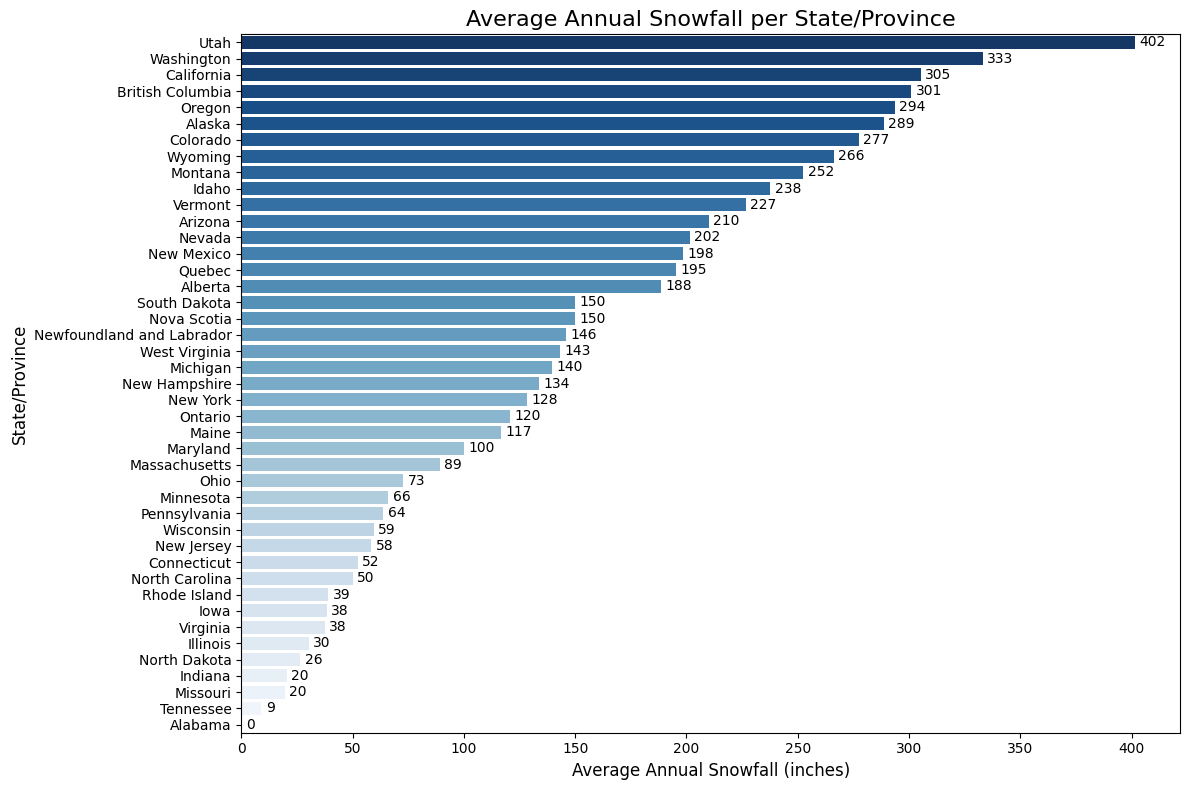

In [17]:
# Group by state and compute mean snowfall
state_snow = df.groupby('State/Province')['Average Annual Snowfall (inches)'].mean().sort_values(ascending=False).reset_index()

# Plot horizontal barplot
plt.figure(figsize=(12,8))
sns.barplot(
    data=state_snow,
    y='State/Province',
    x='Average Annual Snowfall (inches)',
    palette='Blues_r'
)

# Annotate each bar
for i, row in state_snow.iterrows():
    plt.text(row['Average Annual Snowfall (inches)'] + 2, i, f"{row['Average Annual Snowfall (inches)']:.0f}", 
             va='center', fontsize=10)

# Labels and title
plt.xlabel('Average Annual Snowfall (inches)', fontsize=12)
plt.ylabel('State/Province', fontsize=12)
plt.title('Average Annual Snowfall per State/Province', fontsize=16)
plt.tight_layout()
plt.show()


In [16]:
df['Vertical Drop (ft)'] = pd.to_numeric(df['Vertical Drop (ft)'], errors='coerce')
df['Skiable Area (acres)'] = pd.to_numeric(df['Skiable Area (acres)'], errors='coerce')
df['Total Trails'] = pd.to_numeric(df['Total Trails'], errors='coerce')


# Define a function to get top N resorts for a metric
def get_top(df, column, N=5):
    return df.nlargest(N, column)[['Resort Name', 'State/Province', column]]

# Step 1: Top 5 tallest resorts
print("Top 5 Peak Elevation:")
print(get_top(df, 'Peak Elevation (ft)'))

# Step 2: Top 5 steepest resorts
print("\nTop 5 Vertical Drop:")
print(get_top(df, 'Vertical Drop (ft)'))

# Step 3: Top 5 largest resorts by skiable area
print("\nTop 5 Skiable Area:")
print(get_top(df, 'Skiable Area (acres)'))

# Step 4: Top 5 most trails
print("\nTop 5 Total Trails:")
print(get_top(df, 'Total Trails'))

# Step 5: Top 5 most lifts
print("\nTop 5 Total Lifts:")
print(get_top(df, 'Total Lifts'))

# Step 6: Top 5 snowiest resorts
print("\nTop 5 Average Annual Snowfall:")
print(get_top(df, 'Average Annual Snowfall (inches)'))

Top 5 Peak Elevation:
                 Resort Name State/Province  Peak Elevation (ft)
269       Silverton Mountain       Colorado              13487.0
24      Telluride Ski Resort       Colorado              13150.0
25            Arapahoe Basin       Colorado              13050.0
32         Loveland Ski Area       Colorado              13010.0
36   Breckenridge Ski Resort       Colorado              12998.0

Top 5 Vertical Drop:
                    Resort Name    State/Province  Vertical Drop (ft)
33   Revelstoke Mountain Resort  British Columbia              5620.0
71           Whistler Blackcomb  British Columbia              5280.0
24         Telluride Ski Resort          Colorado              4425.0
122                    Snowmass          Colorado              4400.0
29               Big Sky Resort           Montana              4350.0

Top 5 Skiable Area:
                  Resort Name    State/Province  Skiable Area (acres)
71         Whistler Blackcomb  British Columbia        

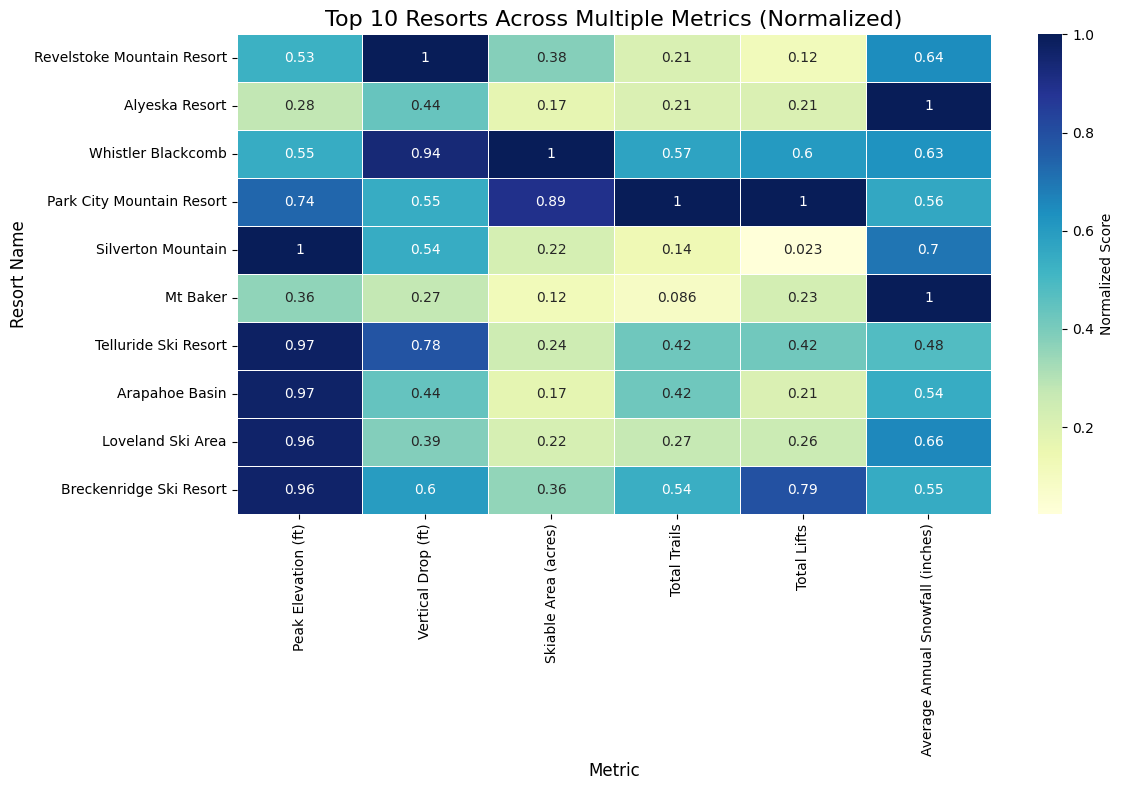

In [13]:
# Make sure numeric columns are numeric
numeric_cols = ['Peak Elevation (ft)', 'Vertical Drop (ft)', 'Skiable Area (acres)',
                'Total Trails', 'Total Lifts', 'Average Annual Snowfall (inches)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 1: Select relevant columns
extreme_cols = ['Resort Name'] + numeric_cols
df_extreme = df[extreme_cols].copy()

# Step 2: Normalize each column (0-1) for comparison
df_norm = df_extreme.copy()
for col in numeric_cols:
    df_norm[col] = (df_extreme[col] - df_extreme[col].min()) / (df_extreme[col].max() - df_extreme[col].min())

# Step 3: Keep top N resorts by any metric
top_resorts = df_norm.set_index('Resort Name').max(axis=1).nlargest(10).index
df_top = df_norm.set_index('Resort Name').loc[top_resorts]

# Step 4: Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_top, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Normalized Score'}, linewidths=0.5)
plt.title('Top 10 Resorts Across Multiple Metrics (Normalized)', fontsize=16)
plt.ylabel('Resort Name', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.tight_layout()
plt.show()

# Analysis of Extreme Ski Resorts

# To understand which resorts stand out across multiple dimensions, we created a heatmap of the top 10 resorts based on six key metrics:

# Peak Elevation (ft) – How tall the resort is.

# Vertical Drop (ft) – How steep the slopes are.

# Skiable Area (acres) – Total size of the skiable terrain.

# Total Trails – Number of trails available.

# Total Lifts – Number of lifts servicing the resort.

# Average Annual Snowfall (inches) – Typical snow accumulation.

# Methodology

# Each metric was normalized to a 0–1 scale so they are comparable.

# The top 10 resorts were selected based on having the highest normalized score in at least one metric.

# A heatmap was created where darker colors indicate higher relative values for that metric.

# Interpretation

# Resorts that are dark across multiple columns are “all-around extreme” resorts. For example:

# Some resorts have both very high peaks and large vertical drops, making them attractive for advanced skiers.

# Others may not be the tallest but have large skiable areas or many trails, making them appealing for families or powder enthusiasts.

# The heatmap highlights which resorts dominate in multiple categories versus those that are only extreme in one dimension.

# This analysis helps identify resorts that offer the most extreme overall skiing experience, not just based on a single factor like snowfall or slope steepness.

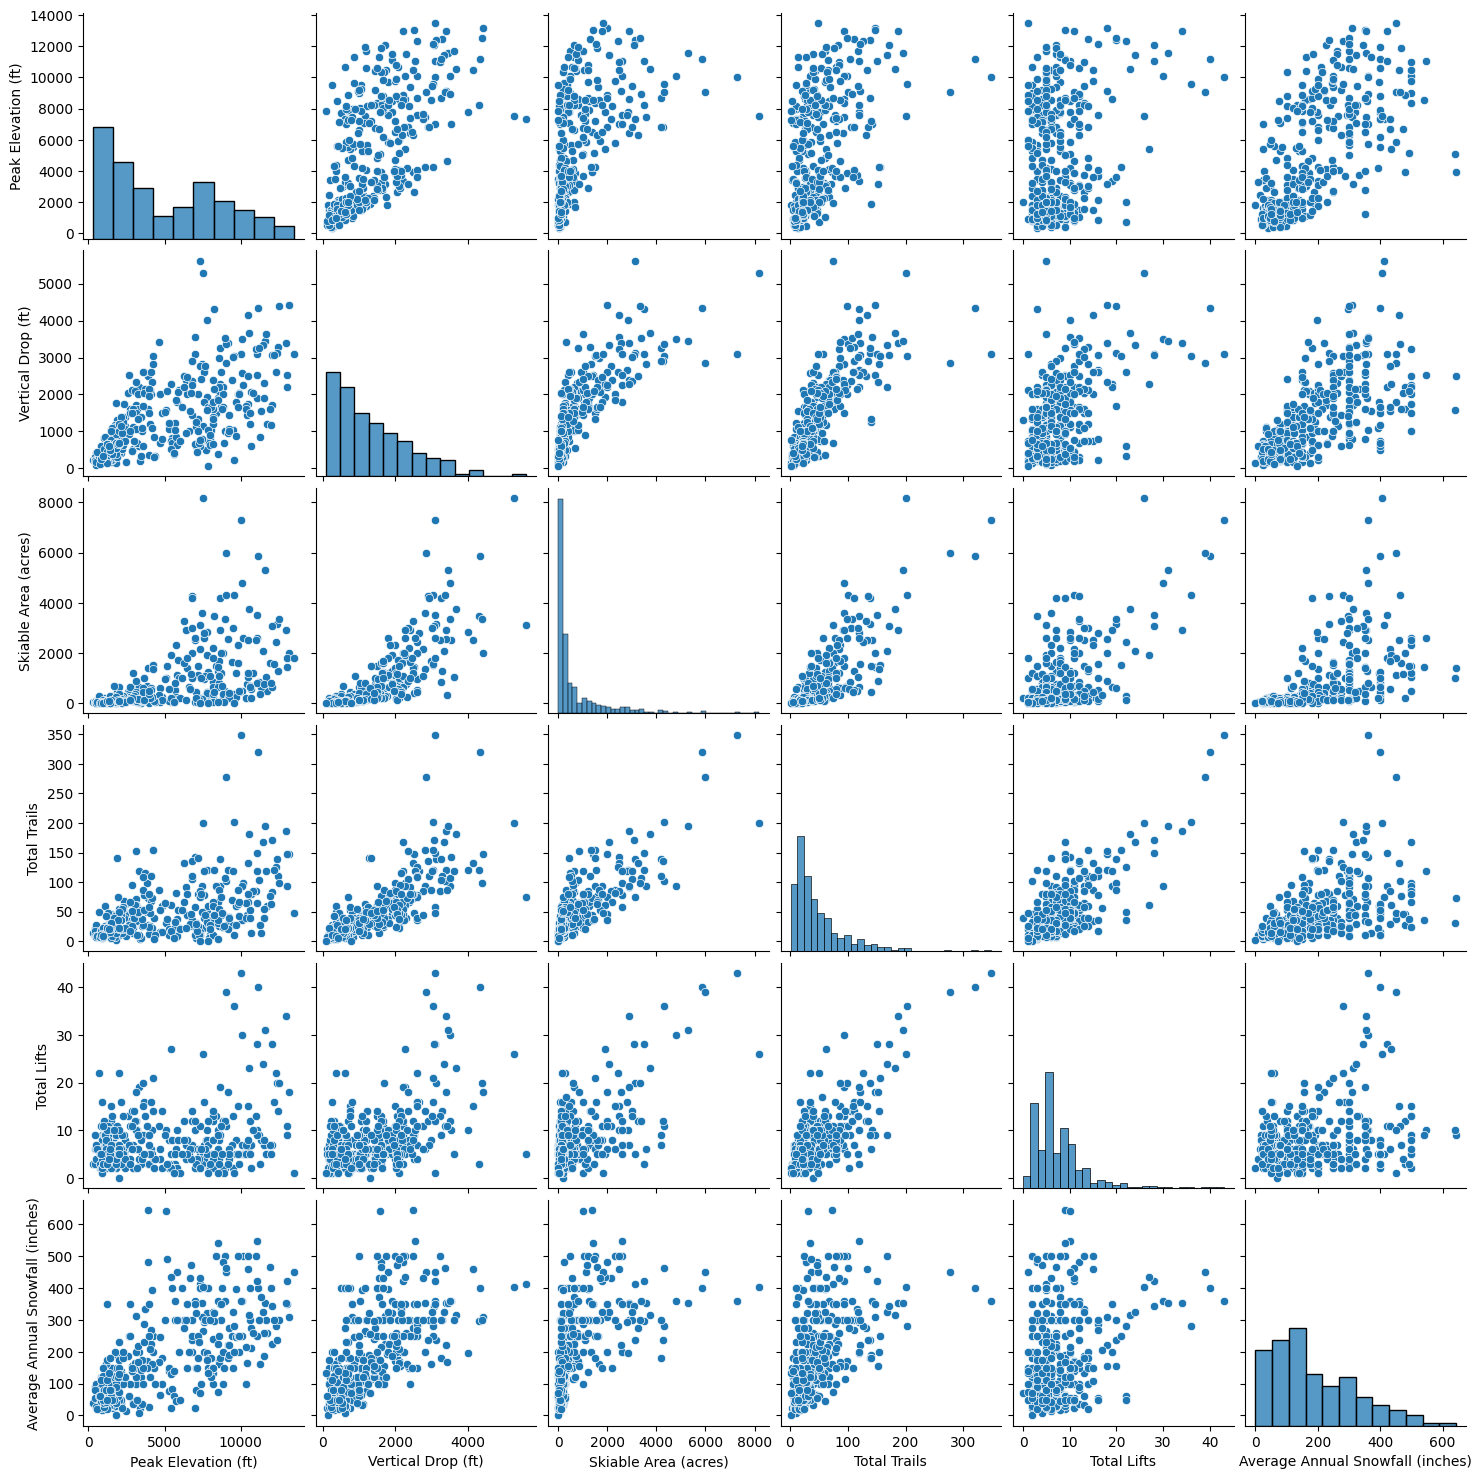

In [14]:
sns.pairplot(df[numeric_cols])
plt.show()

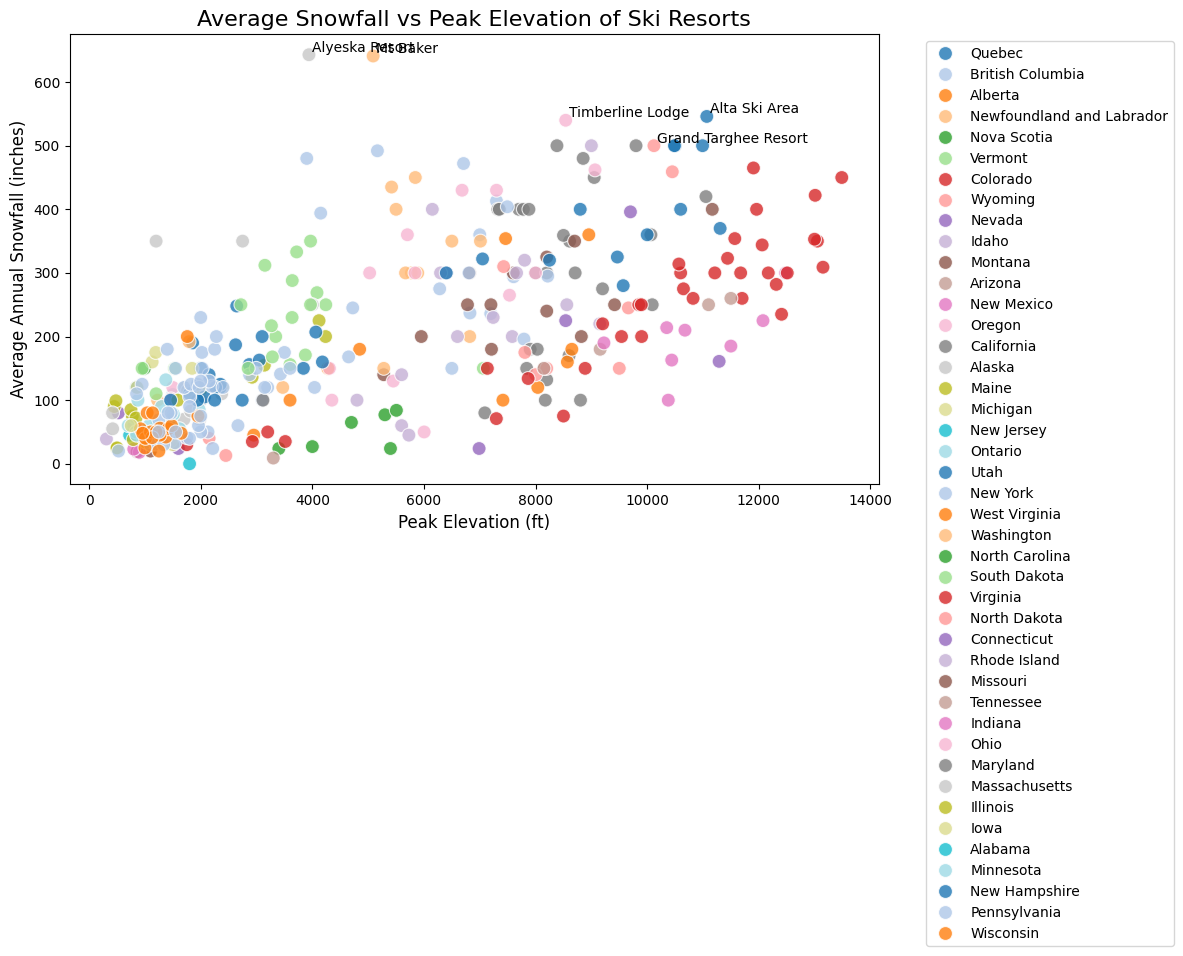

In [15]:
# average snow fall and peak elevation correlation scatterplot!
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df,
    x='Peak Elevation (ft)',
    y='Average Annual Snowfall (inches)',
    hue='State/Province',
    palette='tab20',
    s=100,
    alpha=0.8
)

# Annotate top 5 resorts by snowfall
top_snow = df.nlargest(5, 'Average Annual Snowfall (inches)')
for i, row in top_snow.iterrows():
    plt.text(row['Peak Elevation (ft)'] + 50, row['Average Annual Snowfall (inches)'] + 5, 
             row['Resort Name'], fontsize=10)

# Labels and title
plt.xlabel('Peak Elevation (ft)', fontsize=12)
plt.ylabel('Average Annual Snowfall (inches)', fontsize=12)
plt.title('Average Snowfall vs Peak Elevation of Ski Resorts', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()